In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv("customer_shopping_data.csv")



In [3]:
df1 = df0.copy()

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
# convertir el
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], dayfirst=True )

In [6]:
df1['invoice_date'].head(2)

0   2022-08-05
1   2021-12-12
Name: invoice_date, dtype: datetime64[ns]

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [8]:
# agregar columnas para anuales
df1['year'] = df1['invoice_date'].dt.strftime('%Y')

In [9]:
df1['month'] = df1['invoice_date'].dt.month

In [10]:
df1['month'].head()

0     8
1    12
2    11
3     5
4    10
Name: month, dtype: int32

In [11]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


# relacion de genero y numero de transacciones

[Text(0.5, 1.0, 'relacion de genero y numero de transacciones')]

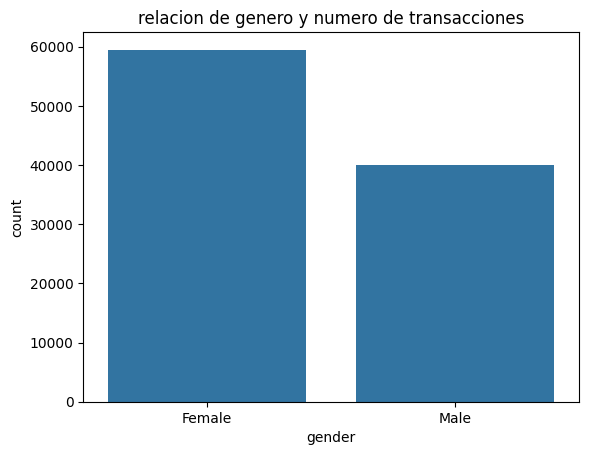

In [12]:
sns.countplot(data=df1, x='gender').set(title='relacion de genero y numero de transacciones')

In [13]:
# cantitad de elementos por categoria
gender_quantity = df1['gender'].value_counts()
print(gender_quantity)

gender
Female    59482
Male      39975
Name: count, dtype: int64


In [14]:
# de esta manera nos da un data frame nuevo y mejor al ojo
df1['gender'].value_counts().reset_index()

,gender,count
0,Female,59482
1,Male,39975


Text(0.5, 1.0, 'relacion de transacciones entre hombres y mujeres')

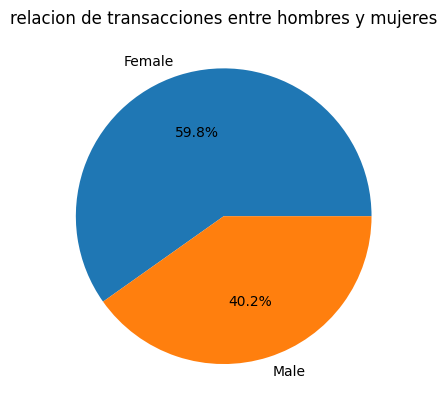

In [15]:
# histograma
plt.pie(gender_quantity, labels=gender_quantity.index, autopct='%1.1f%%')
plt.title('relacion de transacciones entre hombres y mujeres')

# Distribucion de edades por numero de transacciones

In [16]:
df2 = df1.copy()

In [17]:
df2.describe()

,age,quantity,price,invoice_date,month
count,99457.000000,99457.000000,99457.000000,99457,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,6.113898
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,1.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,3.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,6.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,9.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,12.000000
std,14.990054,1.413025,941.184567,NaN,3.569511


In [18]:
# creo nueva colummna para categoria edad
df2['age_cat'] = df2['age']

In [19]:
# defino categoria edades
# funciones para definir categoria de edad
# gen z: 18-24, milllenials 25-34, gen x 35-49, gen boomers 50-64, gen s 65 en adelante

def categoryf(age):
    if (age >= 18) and (age < 25):
        return '18-24'
    elif (age >= 25) and (age < 35):
        return '25-34'
    elif (age >= 35) and (age < 50):
        return '35-49'
    elif (age >= 50) and (age < 65):
        return '50-64'
    else:
        return '65...'

In [20]:
# aplicamos nuestra funcion
df2['age_cat'] = df2['age_cat'].apply(categoryf)

In [21]:
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,65...
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,50-64


[Text(0.5, 1.0, 'Edades por transaccion')]

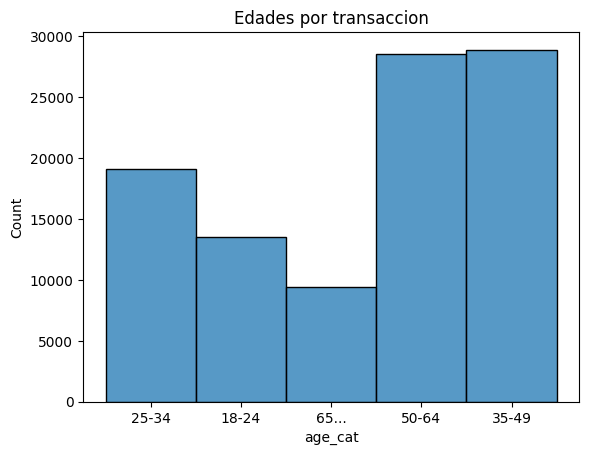

In [22]:
sns.histplot(data=df2, x='age_cat').set(title= 'Edades por transaccion')

# que grupo de edad gasto mas dinero

In [23]:
df3 = df2.copy()

In [24]:
df3['total'] = df3['quantity'] * df3['price']

In [25]:
df3[['total', 'quantity', 'price']].head(3)

,total,quantity,price
0,7502.00,5,1500.40
1,5401.53,3,1800.51
2,300.08,1,300.08


In [26]:
df3_age_total = df3.groupby('age_cat')['total'].sum().reset_index()
df3_age_total

,age_cat,total
0,18-24,33454083.87
1,25-34,47805115.52
2,35-49,74358776.99
3,50-64,71961241.44
4,65...,23926576.43


In [27]:
type(df3_age_total)

pandas.core.frame.DataFrame

<Axes: >

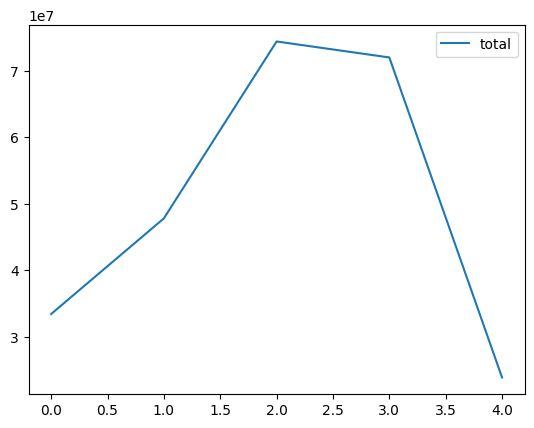

In [28]:
df3_age_total.plot()

C:\Users\diego\AppData\Local\Temp\ipykernel_31976\3854685063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3_age_total, x='age_cat', y= 'total', palette='viridis').set(title= 'Dinero Gastado por edad')


[Text(0.5, 1.0, 'Dinero Gastado por edad')]

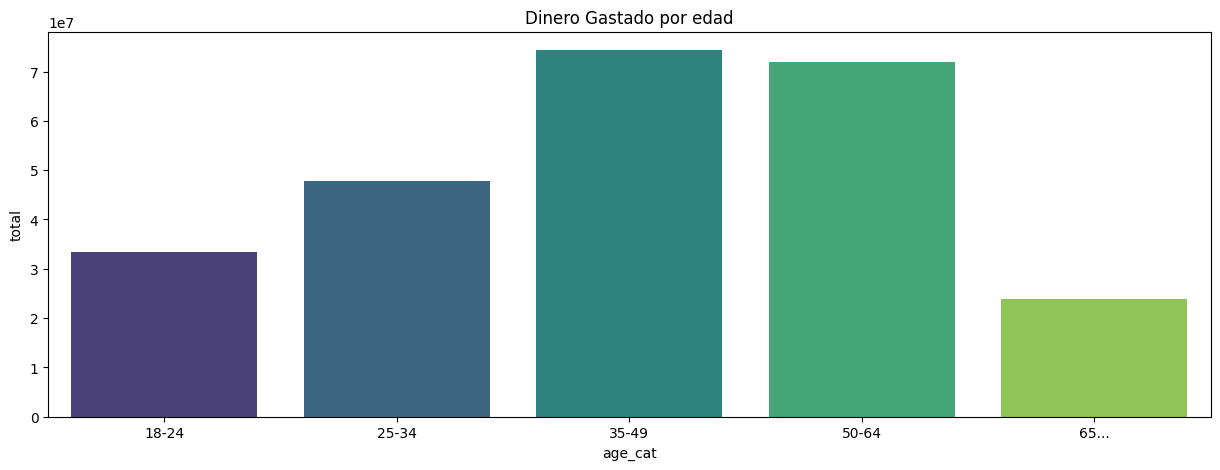

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(data=df3_age_total, x='age_cat', y= 'total', palette='viridis').set(title= 'Dinero Gastado por edad')

In [30]:
# Algunas practicas para refrescar la memoria sobre lo que hemos realizado

In [31]:
df0['invoice_no'].nunique()

99457

In [32]:
columns_name = df1.columns.to_list()
print(columns_name)

['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall', 'year', 'month']


In [33]:
# cambiando el orden de las columnas del data frame
columns_name_2 = ['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'year', 'month','shopping_mall']

In [34]:
# df1 atributos ordenados
df_1_2 = df1[columns_name_2]

In [35]:
df_1_2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon


## 4- Comprobar la distribucion por edades entre hombres y mujeres

In [36]:
df4 = df3.copy()

In [37]:
df4.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,50-64,242.40


In [38]:
df_age_gender_total = df4.groupby(['gender', 'age_cat'])['total'].sum().sort_values(ascending=False).reset_index(name= 'cantidad')

In [39]:
df_age_gender_total

,gender,age_cat,cantidad
0,Female,35-49,44244395.29
1,Female,50-64,43144077.33
2,Male,35-49,30114381.70
3,Male,50-64,28817164.11
4,Female,25-34,28532699.19
5,Female,18-24,20285122.34
6,Male,25-34,19272416.33
7,Female,65...,14000841.87
8,Male,18-24,13168961.53
9,Male,65...,9925734.56


In [40]:
df_age_gender_quantity = df4.groupby(['gender', 'age_cat'])['total'].size().sort_values(ascending=False).reset_index(name= 'cantidad')
df_age_gender_quantity

,gender,age_cat,cantidad
0,Female,35-49,17355
1,Female,50-64,17080
2,Male,35-49,11551
3,Female,25-34,11474
4,Male,50-64,11467
5,Female,18-24,7938
6,Male,25-34,7607
7,Female,65...,5635
8,Male,18-24,5558
9,Male,65...,3792


Text(0.5, 1.0, 'Distribucion entre generos y por edades')

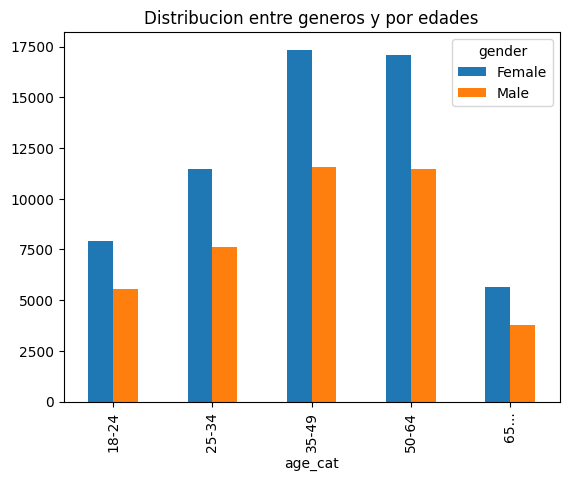

In [41]:
df_age_gender_quantity.pivot(index='age_cat', columns='gender', values='cantidad').plot(kind='bar')
plt.title('Distribucion entre generos y por edades')

# Determinar que compro cada una y donde

In [42]:
df_age_gender_total_f = df_age_gender_total [ df_age_gender_total ['gender']== 'Female']
df_age_gender_total_f

,gender,age_cat,cantidad
0,Female,35-49,44244395.29
1,Female,50-64,43144077.33
4,Female,25-34,28532699.19
5,Female,18-24,20285122.34
7,Female,65...,14000841.87


In [43]:
df_age_gender_total_m = df_age_gender_total [ df_age_gender_total ['gender'] == 'Male']
df_age_gender_total_m

,gender,age_cat,cantidad
2,Male,35-49,30114381.70
3,Male,50-64,28817164.11
6,Male,25-34,19272416.33
8,Male,18-24,13168961.53
9,Male,65...,9925734.56


C:\Users\diego\AppData\Local\Temp\ipykernel_31976\312533530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_age_gender_total_f, x='age_cat', y='cantidad', palette='Paired').set(title='Dinero gastado entre generos y edades')


[Text(0.5, 1.0, 'Dinero gastado entre generos y edades')]

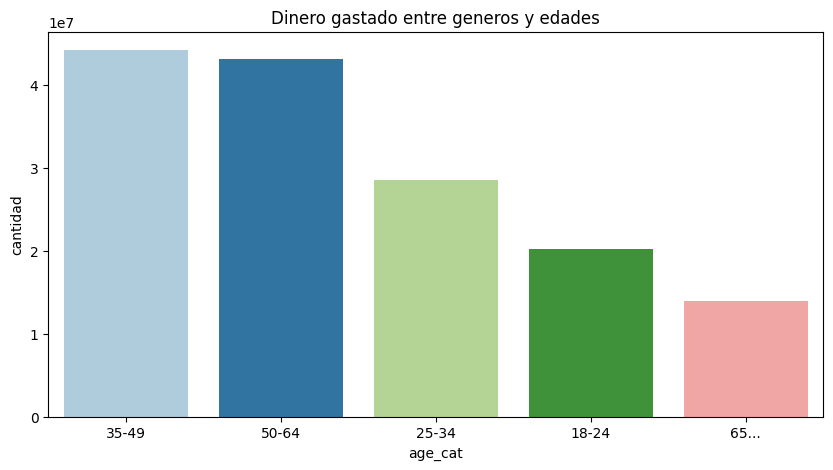

In [44]:
# Grafica
plt.figure(figsize=(10,5))
sns.barplot(data=df_age_gender_total_f, x='age_cat', y='cantidad', palette='Paired').set(title='Dinero gastado entre generos y edades')

### 5 Forma de pago y transacciones

In [46]:
# copia del data frame original
df5 = df0.copy()

In [47]:
df5['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [53]:
# conteo de valores por categoria
df_methods = df5['payment_method'].value_counts().reset_index()
df_methods.head()

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


### 6 Relacion entre la cantidad de dinero gastada y el método de pago

In [54]:
df6 = df0.copy()

In [56]:
df6['total'] = df6['price'] * df6['quantity']

In [57]:
df6.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [75]:
df_total_method = df6.groupby('payment_method')['total'].sum().reset_index()


In [76]:
df_total_method

,payment_method,total
0,Cash,1.128322e+08
1,Credit Card,8.807712e+07
2,Debit Card,5.059643e+07


C:\Users\diego\AppData\Local\Temp\ipykernel_31976\1281135671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_total_method, x='payment_method', y='total', palette='Paired').set(title='Dinero gastado por cada metodo de pago')


[Text(0.5, 1.0, 'Dinero gastado por cada metodo de pago')]

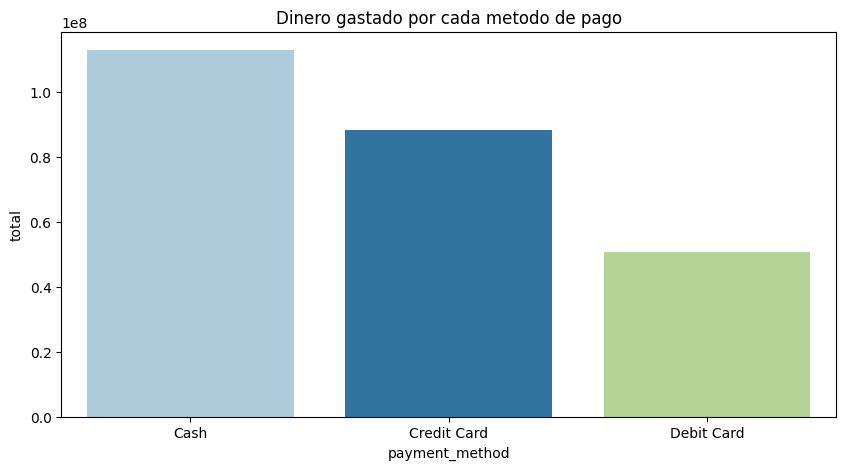

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_total_method, x='payment_method', y='total', palette='Paired').set(title='Dinero gastado por cada metodo de pago')

### 7 Investigar qué precios de productos suelen preferir los clientes

In [78]:
df7 = df0.copy()

In [80]:
df7.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [81]:
df7['price'].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

<Axes: >

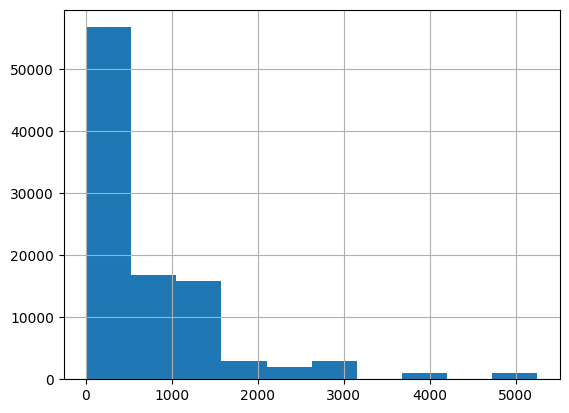

In [83]:
# precio eje x, transacciones eje y
df7['price'].hist()

In [86]:
df7_1 = df2.copy()
df7_1.groupby(['age_cat', 'category'])['price'].sum()

age_cat  category       
18-24    Books                32330.10
         Clothing           4172012.24
         Cosmetics           242984.16
         Food & Beverage      32117.43
         Shoes              2494906.69
         Souvenir             23729.79
         Technology         2009700.00
         Toys                152929.28
25-34    Books                42829.05
         Clothing           5944884.88
         Cosmetics           355734.34
         Food & Beverage      43806.48
         Shoes              3486387.53
         Souvenir             34767.72
         Technology         2972550.00
         Toys                208624.64
35-49    Books                64508.70
         Clothing           9056714.48
         Cosmetics           537606.52
         Food & Beverage      67608.21
         Shoes              5262890.73
         Souvenir             49817.31
         Technology         4852050.00
         Toys                312130.56
50-64    Books                65584.35


In [87]:
df7_1.groupby( 'category')['price'].sum()

category
Books                226977.30
Clothing           31075684.64
Cosmetics           1848606.90
Food & Beverage      231568.71
Shoes              18135336.89
Souvenir             174436.83
Technology         15772050.00
Toys                1086704.64
Name: price, dtype: float64

In [89]:
df7_1

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,65...
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,50-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022,9,35-49
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021,9,25-34
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021,3,50-64
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021,3,50-64


In [91]:
df7_1['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [95]:
# cantidad de transacciones por precio y categoria de producto.
df7_1.groupby('category')['price'].value_counts().reset_index()

,category,price,count
0,Books,75.75,1029
1,Books,30.30,1008
2,Books,45.45,1000
3,Books,15.15,985
4,Books,60.60,959
5,Clothing,600.16,6950
6,Clothing,1500.40,6940
7,Clothing,900.24,6907
8,Clothing,1200.32,6849
9,Clothing,300.08,6841
